## Insurance linear regression by smoker and charge

In [14]:
#import relevant libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
#import dataset
insurance = pd.read_csv('datasets/insuranceData.csv')

In [3]:
insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [4]:
#X dataset will be all rows and all columns except the last one.
#y dataset will be all rows and only the last column 'charges'. This will be our dependent variable
X = insurance.iloc[:, :-1].values
y = insurance.iloc[:, 4].values

In [5]:
X

array([[19, 27.9, 0, 'yes'],
       [18, 33.77, 1, 'no'],
       [28, 33.0, 3, 'no'],
       ...,
       [18, 36.85, 0, 'no'],
       [21, 25.8, 0, 'no'],
       [61, 29.07, 0, 'yes']], dtype=object)

In [12]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

C:\Users\aerap\AppData\Local\Temp\ipykernel_17848\4168551737.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance.corr())


<Axes: >

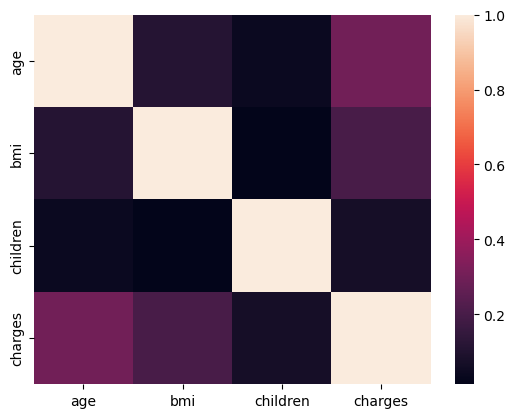

In [15]:
#heatmap getting idea of relationships of correlation
sns.heatmap(insurance.corr())

In [6]:
#encode the 'yes' 'no' data in 'smoker' column to 1s and 0s
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

In [7]:
#since our model may confuse the data as a greater or equal situation instead of as a numeral label to catergorical label relationship
#we use one hot encoder. This way the data is transformed from the labelencoder 1s and 0s to an array which the computer can 
#better understand as 'catergorical' data
onehotencoder = ColumnTransformer([('smoker', OneHotEncoder(), [3])], remainder = 'passthrough')
X = onehotencoder.fit_transform(X)

In [8]:
X

array([[0.0, 1.0, 19, 27.9, 0],
       [1.0, 0.0, 18, 33.77, 1],
       [1.0, 0.0, 28, 33.0, 3],
       ...,
       [1.0, 0.0, 18, 36.85, 0],
       [1.0, 0.0, 21, 25.8, 0],
       [0.0, 1.0, 61, 29.07, 0]], dtype=object)

In [9]:
#as you can see abover another column was added during onehotencoding. This is removed with this:
X = X[:, 1:]

In [10]:
#we are left with our original values 
X

array([[1.0, 19, 27.9, 0],
       [0.0, 18, 33.77, 1],
       [0.0, 28, 33.0, 3],
       ...,
       [0.0, 18, 36.85, 0],
       [0.0, 21, 25.8, 0],
       [1.0, 61, 29.07, 0]], dtype=object)

In [16]:
#splitting the data to training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=0 )

In [17]:
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(x_train, y_train)

LinearRegression()

In [18]:
#training our linear regression on our train data
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
#using the linear regression and the predict function, using the x test data we 
#set up a variable to predict values based on given test values
#the reason we don't use the x_train data is that the data was trained by that data
#if we used it it could show excellent correlation but when given new data will show less correlation
y_pred = regressor.predict(x_test)
y_pred

array([ 1.14589037e+04,  9.92563631e+03,  3.78118827e+04,  1.58808943e+04,
        6.97360055e+03,  3.68353076e+03,  1.15342243e+03,  1.39982132e+04,
        8.75503190e+03,  7.23945973e+03,  4.22918693e+03,  1.01339013e+04,
        9.07255566e+03,  4.34700013e+03,  2.78291848e+04,  1.11703666e+04,
        1.12276150e+04,  5.55254705e+03,  8.02828014e+03,  2.67296924e+04,
        3.36425305e+04,  1.40398303e+04,  1.12405201e+04,  3.27140150e+04,
        4.50454593e+03,  8.59659654e+03,  8.77241144e+02,  1.01373043e+04,
        4.28492066e+03,  1.01976920e+04,  8.78895560e+03,  4.03641538e+04,
        1.58290309e+04,  1.40146947e+04,  2.45685410e+04,  4.71532278e+03,
        1.28534755e+04,  3.09849097e+04,  3.33370702e+04,  3.84806679e+03,
        3.71745446e+03,  4.46372948e+03,  3.02320057e+04,  3.92297404e+04,
        2.81489195e+04,  4.76793034e+03,  1.10671287e+04,  7.69629560e+03,
        3.27251571e+03,  1.07866355e+04,  5.10182957e+03,  3.20203963e+03,
        3.34514718e+04,  

In [21]:
#short detour showing the coefficients in our regression 
print(regressor.coef_)

[23699.70723511   254.72171877   312.84193584   429.55191964]


In [25]:
#if you can do regressor coefficient you can do regressor intercept
print(regressor.intercept_)

-11664.004052172008


In [23]:
#so we can attribute 80% of the variability in the charges to the given independent variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7904465130093583